

Nn Activation Comparison


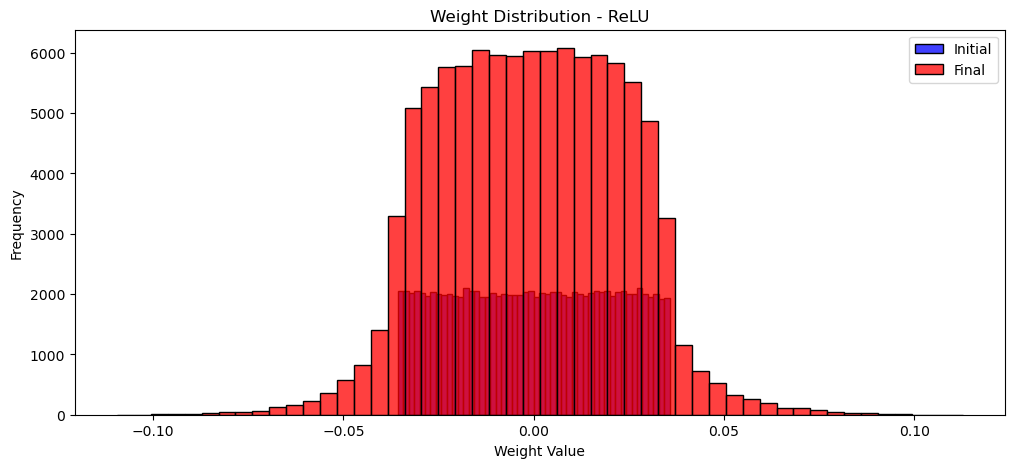

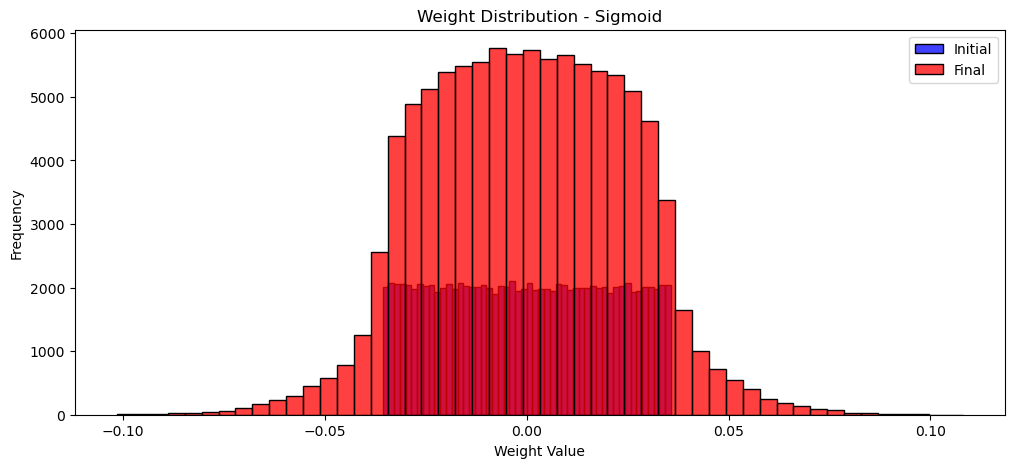

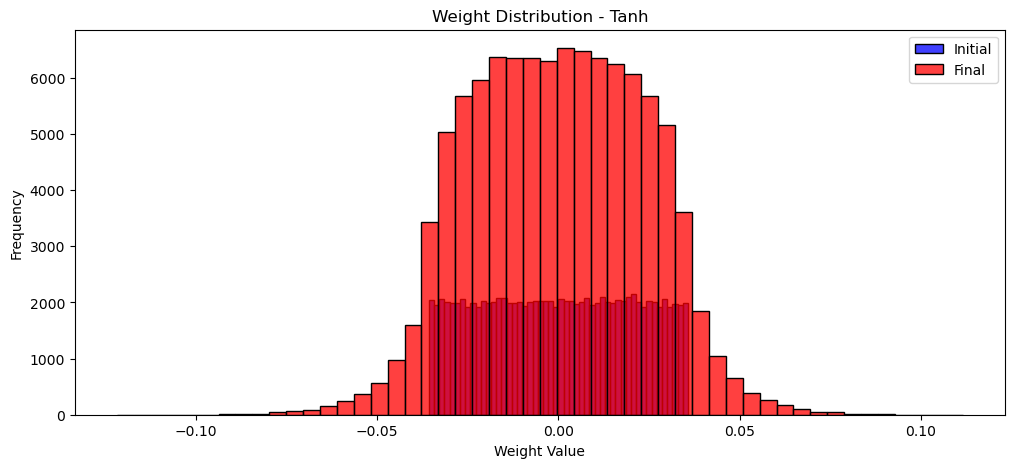

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns

# Define Neural Network Class
class NeuralNet(nn.Module):
    def __init__(self, activation_fn):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.activation = activation_fn

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Load Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)  # Reduced batch size

# Define activation functions
activations = {
    'ReLU': nn.ReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh()
}

# Train and Compare Weight Distribution
def train_and_analyze(activation_name, activation_fn):
    model = NeuralNet(activation_fn)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Store initial weights
    initial_weights = model.fc1.weight.data.clone().detach().cpu()
    
    # Train model for a few epochs
    for epoch in range(3):  # Reduced epochs to minimize memory usage
        for images, labels in trainloader:
            images, labels = images.to(torch.device('cpu')), labels.to(torch.device('cpu'))
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
    # Store final weights
    final_weights = model.fc1.weight.data.clone().detach().cpu()
    
    # Plot weight distributions
    plt.figure(figsize=(12, 5))
    sns.histplot(initial_weights.numpy().flatten(), bins=50, color='blue', label='Initial', kde=False)
    sns.histplot(final_weights.numpy().flatten(), bins=50, color='red', label='Final', kde=False)
    plt.title(f'Weight Distribution - {activation_name}')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Run training and analysis for each activation function
for name, activation in activations.items():
    train_and_analyze(name, activation)